<a href="https://colab.research.google.com/github/123nishan/EVAC/blob/main/walkthrough1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of Evolutionary Algorithms

Welcome to the first code walkthrough for EVCO. Here we will be taking a look at the elements that comprise a basic evolutionary algorithm using the package DEAP in Python.

# Elements to take into account using evolutionary algorithms

* **Individual representation**
* **Evaluation** and **fitness assignment**

The above two are key considerations that need the most thought. But there's also:

* **Selection**
* **Variation**, produced by applying operators, such as **crossover**, and **mutation**
* **Stopping criterion**, that determines when the algorithm shoulod be stopped, either because the optimum was reach or because the optimization process is not progressing.

## The general structure of a generic algorithm

    def evolutionary_algorithm():

        population = [] # a list with all the individuals in the population

        population =  initialize_population(pop_size)
        t = 0

        while not stop_criterion( population[t] ):
            fitnesses = evaluate( population[t] )
            populations[t+1] = environmental_selection( population[t], offspring )
            offspring = mating_and_mutation( population[t], fitnesses )
            t = t+1

## DEAP: A Python library for evolutionary computation

https://deap.readthedocs.io/en/master/




# Essential features of a DEAP GA

- deap.creator: meta-factory allowing to create classes that will fulfill the needs of your evolutionary algorithms.
- deap.base.Toolbox: A toolbox for evolution that contains the evolutionary operators. You may populate the toolbox with any other function by using the register() method
- deap.base.Fitness([values]): The fitness is a measure of quality of a solution. If values are provided as a tuple, the fitness is initalized using those values, otherwise it is empty (or invalid). You should inherit from this class to define your custom fitnesses.

# Installing the packages in Colab

In [ ]:
!pip install deap

     |████████████████████████████████| 160 kB 14.1 MB/s 


# Defining an individual and their representation

First import the required modules and register the different functions required to create individuals that are a list of floats with a minimizing two objectives fitness.

In [ ]:
import random

from deap import base
from deap import creator
from deap import tools

In [ ]:
IND_SIZE = 5

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox1 = base.Toolbox()
toolbox1.register("attr_float", random.random)
toolbox1.register("individual", tools.initRepeat, creator.Individual,
                 toolbox1.attr_float, n=IND_SIZE)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


The first individual can now be constructed

In [ ]:
ind1 = toolbox1.individual()

Printing the individual ind1 and checking if its fitness is valid will give something like this

In [ ]:
print(ind1)

[0.8571161985106227, 0.8276027255682098, 0.9473506732357823, 0.7516021195312007, 0.23759645678661323]


In [ ]:
ind1.fitness.valid

False

The individual is printed as its base class representation (here a list) and the fitness is invalid because it contains no values.

# Defining a population of individuals

We can now register a population in the toolbox to fill with our individuals

In [ ]:
toolbox1.register("population", tools.initRepeat, list, toolbox1.individual)

And then use it to create an initial population.

In [ ]:
pop = toolbox1.population(n=20)

Let's look at the first individual

In [ ]:
print( pop[0] )

[0.7538828436524245, 0.9828546560102246, 0.12756306085729952, 0.03505213601803203, 0.4692170122703325]


# Evaluation and fitness

The evaluation is the part of the algorithm that evaluates fitness. For some problems evaluation can be done in many different ways, with some being better than others. But this can be a bit of an art and takes some thinking and some experience. In DEAP:
- It is the only part of the library that you must always write yourself.
- A typical evaluation function takes one individual as argument and return its fitness as a tuple.
- A fitness is a list of floating point values and has a property valid to know if this individual shall be re-evaluated
- The fitness is set by setting the values to the associated tuple.

For example, the following evaluates the previously created individual ind1 and assign its fitness to the corresponding values.

In [ ]:
def evaluate(individual):
    # Do some computing on the individual
    a = sum(individual)
    return a,

Dealing with single fitness measure is not different in DEAP. The evaluation function must still return a tuple because single-measure fitness is treated as a special case of multi-measure (multi-objective) fitness.

To evaluate an individual you can now just call your evaluate function. You pass the full individual, and get back to fitness tuple, which you assign to the individuals fitness value.

In [ ]:
ind1 = pop[0]
ind1.fitness.values = evaluate(ind1)

In [ ]:
print(ind1.fitness.valid)

True


In [ ]:
print(ind1)

[0.7538828436524245, 0.9828546560102246, 0.12756306085729952, 0.03505213601803203, 0.4692170122703325]


In [ ]:
ind1.fitness.values

(2.3685697088083133,)

# Selection

Once you have evaluated the fitness of all individuals in the population, you can select the individuals that have a chance to reproduct into the next generation.

- Selection is made among a population by the selection operators that are available in the deap.operators module.
- The selection operator usually takes as first argument an iterable container of individuals and the number of individuals to select. It returns a list containing the references to the selected individuals.

First we must evaluate the fitness of everyone. We only want to evaluate fitness for individuals who have changed. However, noone's fitness will be known in the initial population, so we must first evaluate all individuals.

In [ ]:
fitnesses = list(map(evaluate, pop))

This gives us a list of fitness values corresponding to each individual in the population. Next we assign the fitness to each individual. To do this we use the Python zip command to line up the individuals with their corresponding fitness.

In [ ]:
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

In the following code, we use a naive approach of selecting the top 2 individuals in the population.

In [ ]:
selected = tools.selBest(pop, 2)

Let's see if individual at position 0 in the population managed to be selected

In [ ]:
pop[0] in selected

False

In [ ]:
print( selected )

[[0.10060012310488087, 0.09960504783783908, 0.04542252139172431, 0.3696849278002188, 0.47667540673527486], [0.5282043649922032, 0.7132660031397601, 0.4700735817746279, 0.055726345527094656, 0.015558081026577408]]


Thus, we end up with a list of individuals in 'selected' that may be able to reproduce into the next generation.

# Mutation

- There are a variety of mutation operators in the deap.tools module.
- Each mutation has its own characteristics and may be applied to different type of individual.
- Be sure to read the documentation of the selected operator in order to avoid undesirable behaviour.

To apply a mutation (here a gaussian mutation) on the first individual, simply apply the desired function.

In [ ]:
pop[0]

[0.7538828436524245,
 0.9828546560102246,
 0.12756306085729952,
 0.03505213601803203,
 0.4692170122703325]

In [ ]:
tools.mutGaussian(pop[0], mu=0.0, sigma=0.2, indpb=0.2)

([1.3124649223195606,
  0.9828546560102246,
  0.12756306085729952,
  0.03505213601803203,
  0.4692170122703325],)

Mu and sigma are the terms for the Guassian curve, and indpb is the independent probability of mutation per gene.

You also need to delete the fitness.value for the individual, because it has changed and needs to be re-evaluated the next time we need to its fitness.

In [ ]:
del pop[0].fitness.values

Mutation operators in DEAP are destructive and mutate the original individual in-place. Thus, if you want to keep the original parent pre-mutation, you must make a copy in advance. You will need to do this, because we often want to select individuals 'with replacement', so that the same individual can be selected multiple times. You can clone an individual using the clone function in the toolbox.

In [ ]:
mutant = toolbox1.clone(pop[0])
tools.mutGaussian(mutant, mu=0.0, sigma=0.2, indpb=0.2)
del mutant.fitness.values

# Crossover 

- There are a variety of crossover operators in the deap.tools module.
- Each operator has its own characteristics and may be applied to different type of individuals.
- Be careful to read the documentation of the selected operator in order to avoid undesirable behaviour.

As with mutaton, crossover is destructive and thus you often need to make copies of individuals first. Lets apply a crossover operation to produce the two children that are cloned beforehand. Here is an example of cloning the first two individuals in the population and then crossing them over with each other.

In [ ]:
child1, child2 = [ toolbox1.clone(ind) for ind in (pop[0], pop[1]) ]
tools.cxOnePoint(child1, child2)
del child1.fitness.values
del child2.fitness.values

As with mutation, because you have made a change to the individuals, you need to delete their fitness.values so that they will be re-evaluated next time.

Note that the crossover function gives us two individuals, because we sliced two togehter.

In [ ]:
print(pop[0])
print(pop[1])

[1.3124649223195606, 0.9828546560102246, 0.12756306085729952, 0.03505213601803203, 0.4692170122703325]
[0.36238189912613217, 0.8118836810943175, 0.5568910399736318, 0.7300983686582364, 0.0020946032788144997]


In [ ]:
print(child1)
print(child2)

[1.3124649223195606, 0.9828546560102246, 0.12756306085729952, 0.7300983686582364, 0.0020946032788144997]
[0.36238189912613217, 0.8118836810943175, 0.5568910399736318, 0.03505213601803203, 0.4692170122703325]


Typically you want to implement a probability of crossover.

In [ ]:
cxProb = 0.6

if random.random() < cxProb:
    child1, child2 = [ toolbox1.clone(ind) for ind in (pop[0], pop[1]) ]
    tools.cxOnePoint(child1, child2)
    del child1.fitness.values
    del child2.fitness.values

# Using operators with the toolbox

So far we have only used the toolbox to represent the individual. But the toolbox is also intended to contain all the evolutionary tools, from the object initializers to the evaluation operator. It allows easy configuration of each algorithms.
- The toolbox has basically two methods, register() and unregister(), that are used to add or remove tools from the toolbox.
- The usual names for the evolutionary tools are mate(), mutate(), evaluate() and select(), however, any name can be registered as long as it is unique. Here is how they are registered in the toolbox.
- The main reason to register with the toolbox is to set up an operator with pre-defined parameters.

Remember that we have already defined our toolbox when we defined the individual like this

>from deap import base  
>from deap import tools  
>  
>toolbox1 = base.Toolbox()  
>
>toolbox1.register("attr_float", random.random)  
>toolbox1.register("individual", tools.initRepeat, creator.Individual, toolbox1.attr_float, n=IND_SIZE)

You can register your operators with your toolbox like this

In [ ]:
def evaluateInd(individual):
    # Your evaluation code here
    return result,

toolbox1.register("mate", tools.cxOnePoint)
toolbox1.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox1.register("select", tools.selTournament, tournsize=3)
toolbox1.register("evaluate", evaluateInd)

Now you can call, for example, mutate by calling the toolbox, and it will use the default parameters that you have registered (unless you override them).

In [ ]:
mutant = toolbox1.clone(pop[0])
toolbox1.mutate(mutant)
del mutant.fitness.values

# Tool Decorating

A decorator is a wrapper that is called in place of a function. It is asked to make some initialization and termination work before and after the actual function is called. For example, if values need to be constrained, you can apply a decorator to the mutation to keep any individual from going out-of-bounds.

The following defines a decorator that checks if any attribute of the individual is out-of-bounds and clips it if it is the case. The decorator is defined using three functions in order to receive the min and max arguments. Whenever the mutation or crossover is called, bounds will be check on the resulting individuals.

In [ ]:
def checkBounds(min, max):
    def decorator(func):
        def wrapper(*args, **kargs):
            individuals = func(*args, **kargs)
            for indv in individuals:
                for i in xrange(len(indv)):
                    if indv[i] > max:
                        indv[i] = max
                    elif indv[i] < min:
                        indv[i] = min
            return individuals
        return wrapper
    return decorator

toolbox1.register("mate_example", tools.cxBlend, alpha=0.2)
toolbox1.register("mutate_example", tools.mutGaussian, mu=0, sigma=2)

MIN = 0; MAX = 10

toolbox1.decorate("mate_example", checkBounds(MIN, MAX))
toolbox1.decorate("mutate_example", checkBounds(MIN, MAX))

This will work on crossover and mutation because both return a tuple of individuals. The mutation is often considered to return a single individual but again like for the evaluation, the single individual case is a special case of the multiple individual case.

# A full example using the simple max-one problem

The max-one problem is a simple toy problem that we will use to illustrate a basic GA. Here individuals are represented as bit-strings. Their fitness is evaluated as a function of the number of 1s they have. Its clear that the optimum is an all-ones string. Here is an example of what individuals might look like with a string of length 10.

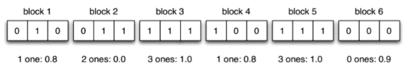


In [ ]:
import random
from deap import algorithms, base, creator, tools

# Defining individuals 

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
toolbox = base.Toolbox()

In [ ]:
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Defining evolutionary operators

In [ ]:
def evalOneMax(individual):
    return (sum(individual),)

In [ ]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("mate", tools.cxUniform, indpb=0.1)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.01)

logbook = tools.Logbook()

# Coding the main body of the algorithm

In [ ]:
pop = toolbox.population(n=300)

fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

NGEN = 50

for g in range(NGEN):
    print("-- Generation %i --" % g)
      
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values
                         
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
         ind.fitness.values = fit
    
    pop[:] = offspring
    
    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --


Now let's have a look at the best individual

In [ ]:
best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s" % (best_ind))
print("With fitness %s" % (best_ind.fitness.values))

Best individual is [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
With fitness 100.0


An interesting thing about this example is that if you don't have mutation set low, it's difficult to find a good solution. Why is this?

# Basic statistics for tracking progress

The toolbox also has a statistics tracker. Below, we define a new statistics tracker. Note that we need to provide it with a function (hence the lambda). All we actually supply is the fitness value, which is the thing we want to perform the statistics on.

In [ ]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

We then register the statistics that we want to record. Here, we register some basic numpy functions.

In [ ]:
import numpy
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

To record statistics for the current population, all you need to do is use the compile function on the population.

In [ ]:
record = stats.compile(pop)

In [ ]:
print(record)

{'avg': 98.06333333333333, 'std': 1.1829295085600926, 'min': 93.0, 'max': 100.0}


What if we want to log all of the records, e.g., over generations or different runs of our algorithm? For this we could use the logbook within generations.

In [ ]:
logbook = tools.Logbook()
logbook.record(gen=0, evals=30, **record)

The code creates a logbook and then records the first record. We have added the generation and number of evaluations, and then include all of the statistics that we just took by including the record object. The ** is Python magic to unpack the records. You can then chose to order the logbook.

In [ ]:
logbook.header = "gen", "avg", "evals", "std", "min", "max"

In [ ]:
print(logbook)

gen	avg    	evals	std    	min	max
0  	98.0633	30   	1.18293	93 	100


# Plotting basic stats

We can use MatplotLib to have a look at how our run went.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")

Text(0, 0.5, 'Mean Fitness')

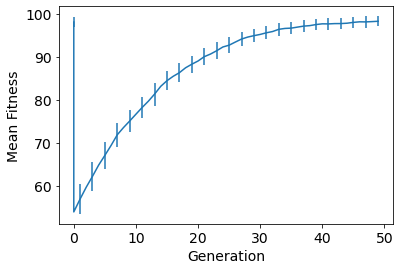

In [ ]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14) 
plt.rc('legend', fontsize=14)

fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

It is important to remember that this is only the result of a single run over time. Because these algorithms are stochastic, you are likely to get a different result every time you run it.

# Built-in algorithms

DEAP has built-in algorithms that run through all the processes in each generation. We will not be using this for three reasons.
1. Because I want you to understand explicitly what is going on in the algorithm.
2. I want you to take ownership over every decision taken in the algorithm.
3. This will provide you with more flexibility moving forward.

But for your information, the built-in algorithms can be used as in the example below.

In [ ]:
pop = toolbox.population(n=200)

In [ ]:
result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                             ngen=100, verbose=False)

In [ ]:
print('Current best fitness:', evalOneMax(tools.selBest(pop, k=1)[0]))

Current best fitness: (100,)
